In [2]:
%cd '/content/drive/MyDrive/FaceMask_Detection '

/content/drive/MyDrive/FaceMask_Detection 


In [3]:
!pwd

/content/drive/MyDrive/FaceMask_Detection 


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/FaceMask_Detection '


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset
!unzip \*.zip && rm *zip

# Import Libraries

In [1]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

## **Read Data**

Open The Folders

In [3]:
with_mask='data/with_mask'
without_mask='data/without_mask'
#Show The Table Which Count The Number Of With_Mask and without_Mask 
pd.DataFrame([len(os.listdir(with_mask)),len(os.listdir(without_mask))],columns=['Number'],index=['with_mask','without_mask'])

Number
with_mask       3725
without_mask    3828

Show The Images

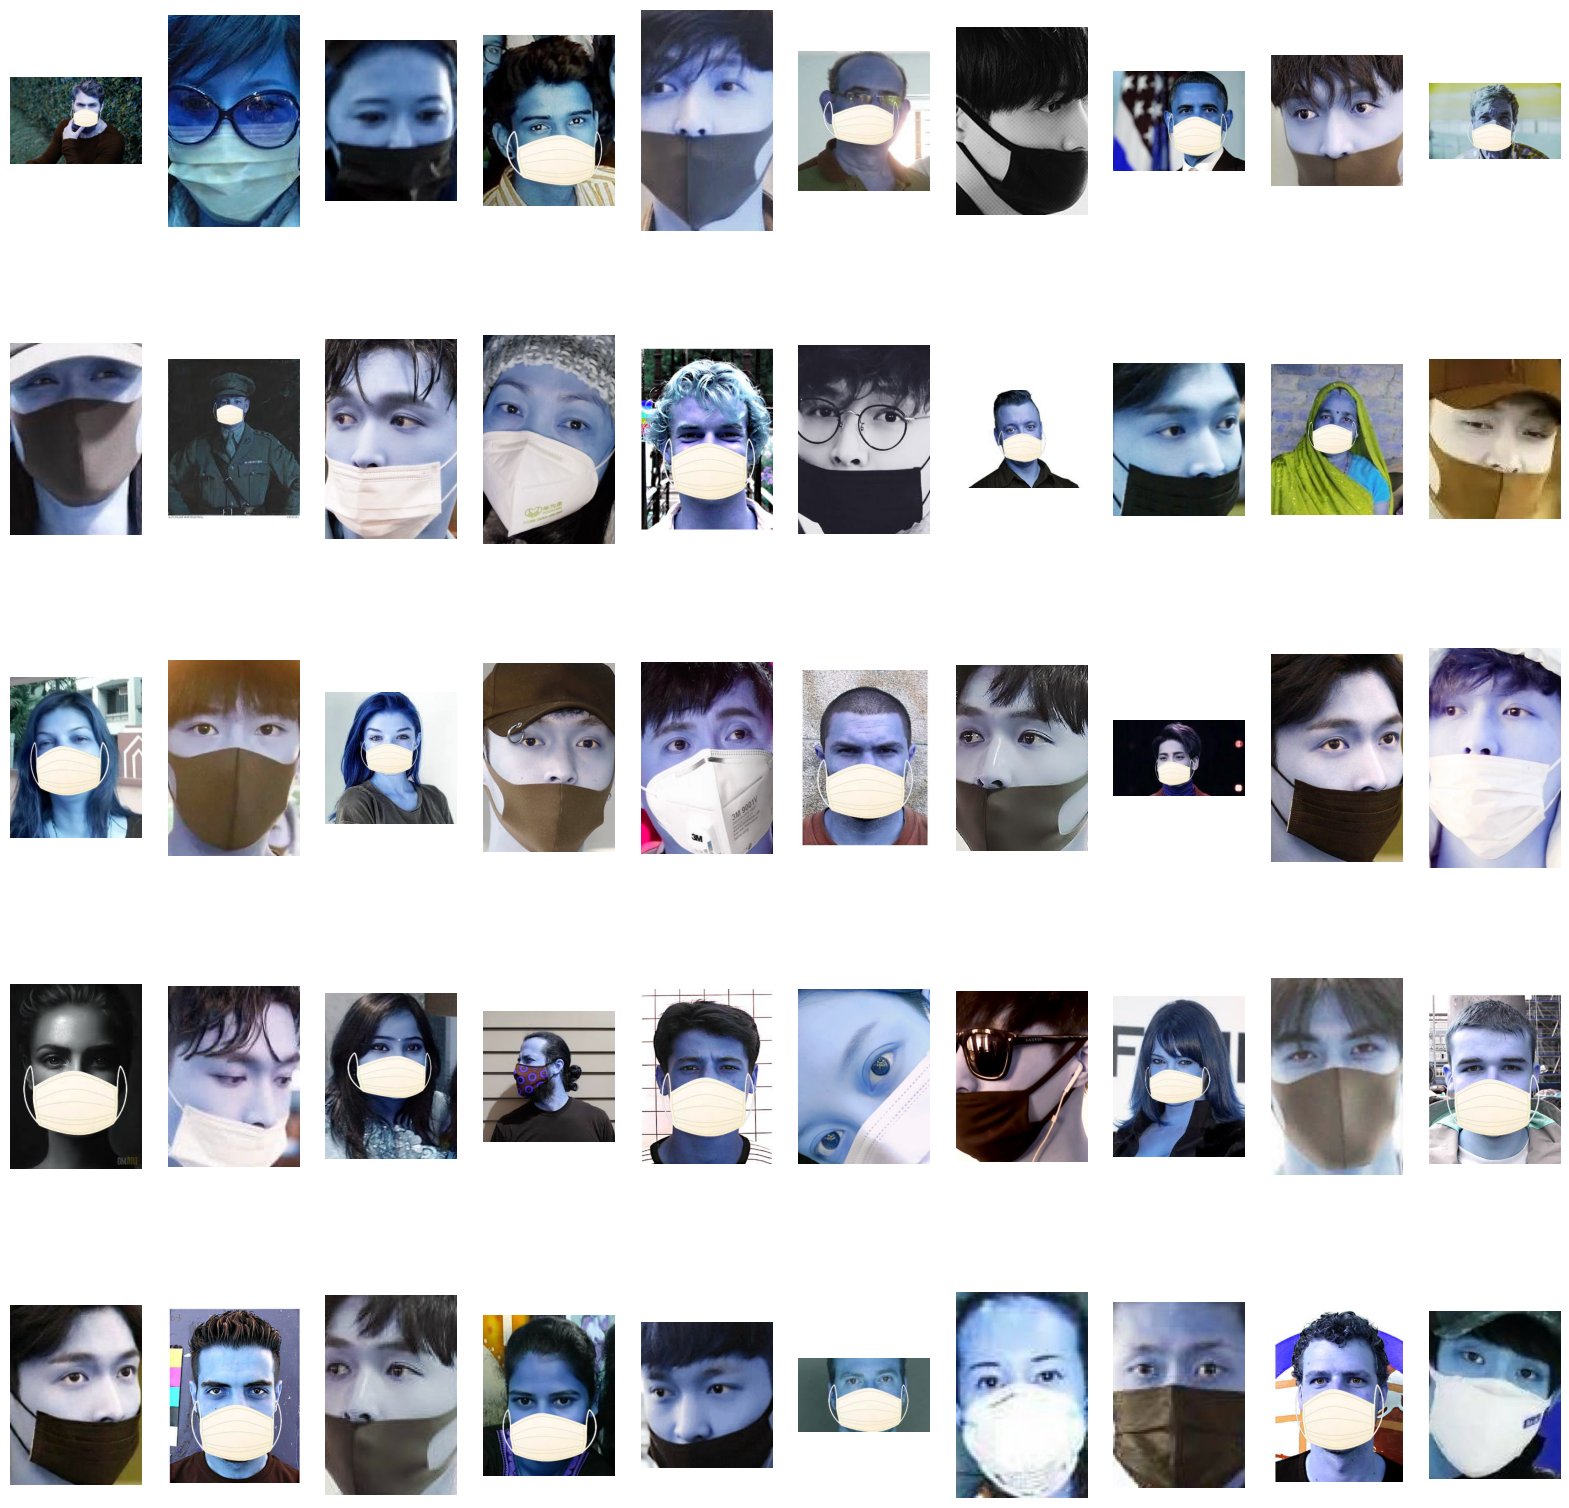

In [26]:
#Show With Mask Image
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(with_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    #Read The Images in  with_mask and put it in img_arr as Numpy array
    img_arr=cv2.imread(os.path.join(with_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')


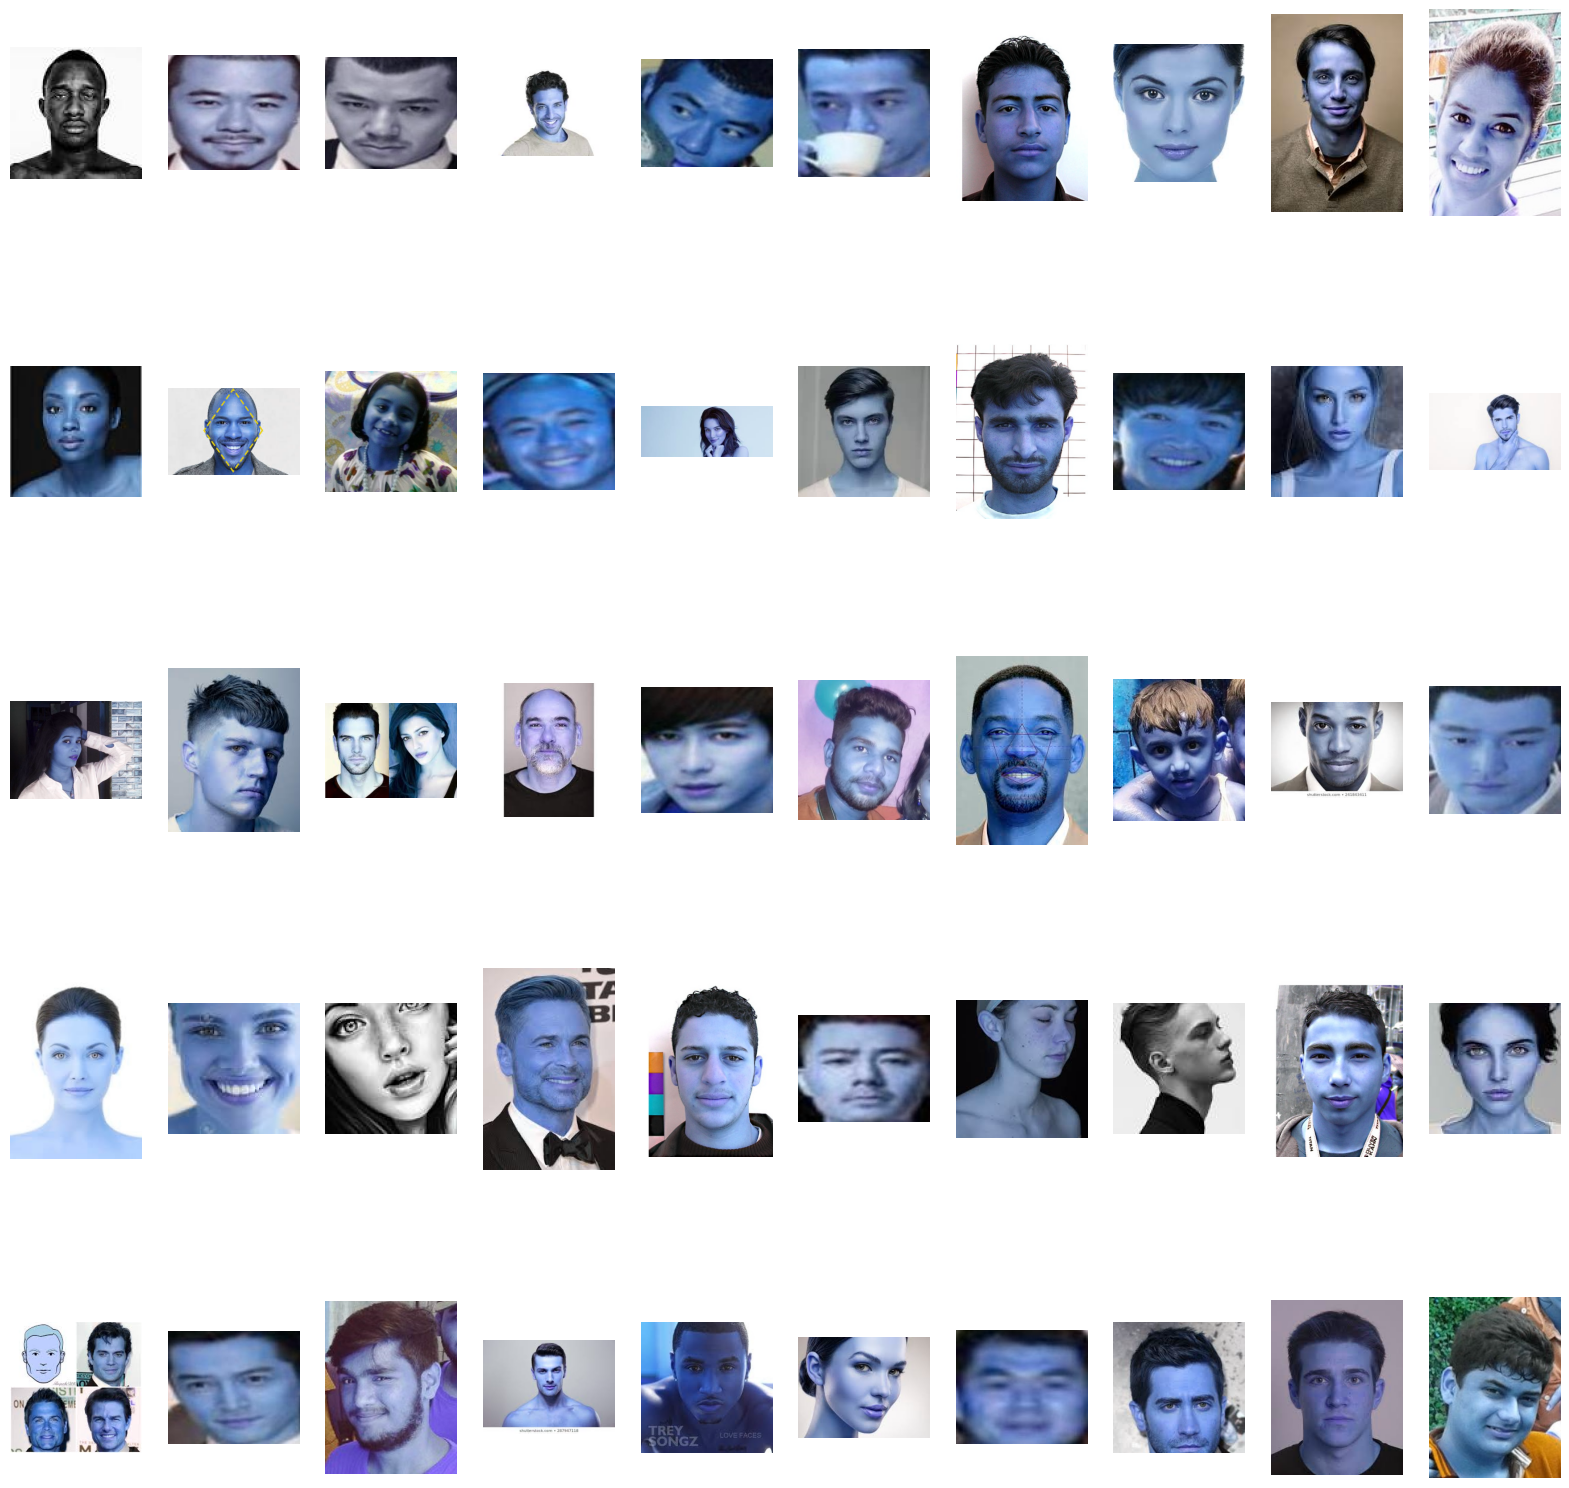

In [5]:
#Show Without Mask Image
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(without_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join(without_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

Store the Input and OuTput and Size of Images in Lists

In [6]:
#input
data=[]
#output
label=[]
#the size of Images
size=[]
#with mask label 1
for img in os.listdir(with_mask):
    img_arr=cv2.imread(os.path.join(with_mask,img))
    data.append(img_arr)
    label.append(1)
    size.append(img_arr.shape)
#without mask label 0
for img in os.listdir(without_mask):
    img_arr=cv2.imread(os.path.join(without_mask,img))
    data.append(img_arr)
    label.append(0)
    size.append(img_arr.shape)

Show The Unique size of Images in Table

In [7]:
pd.DataFrame(pd.Series(size).value_counts(),columns=['Number'])

Number
(225, 225, 3)     664
(428, 320, 3)     381
(275, 183, 3)     255
(100, 100, 3)     207
(183, 275, 3)     181
...               ...
(192, 127, 3)       1
(218, 218, 3)       1
(422, 759, 3)       1
(413, 600, 3)       1
(135, 156, 3)       1

[2692 rows x 1 columns]

Resize The Images

In [8]:
Size=128
for x in range(len(data)):
    data[x]=cv2.resize(data[x],(Size,Size))

##**Split Data to Training and Test**

In [9]:
data=np.array(data)
label=np.array(label)
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=.15,shuffle=True,random_state=44)
print('X Train Shape is :',X_train.shape)
print('X Test Shape is :',X_test.shape)
print('Y Train Shape is :',y_train.shape)
print('Y Test Shape is :',y_test.shape)


X Train Shape is : (6420, 128, 128, 3)
X Test Shape is : (1133, 128, 128, 3)
Y Train Shape is : (6420,)
Y Test Shape is : (1133,)


## **Building Model**

Create The Neural Networks with CNN Layers 

In [24]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(Size,Size,3)),
    keras.layers.MaxPooling2D((3,3)),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='softmax')
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

Compile and Train The Model

In [12]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=10,validation_split = 0.11)


Epoch 1/10
179/179 [==============================] - 45s 242ms/step - loss: 1.3867 - accuracy: 0.6510 - val_loss: 0.6347 - val_accuracy: 0.6747
Epoch 2/10
179/179 [==============================] - 44s 245ms/step - loss: 0.5028 - accuracy: 0.7809 - val_loss: 0.4939 - val_accuracy: 0.8034
Epoch 3/10
179/179 [==============================] - 43s 239ms/step - loss: 0.3718 - accuracy: 0.8577 - val_loss: 0.2929 - val_accuracy: 0.8868
Epoch 4/10
179/179 [==============================] - 42s 235ms/step - loss: 0.2868 - accuracy: 0.8941 - val_loss: 0.2857 - val_accuracy: 0.9024
Epoch 5/10
179/179 [==============================] - 42s 235ms/step - loss: 0.2654 - accuracy: 0.8908 - val_loss: 0.3217 - val_accuracy: 0.8953
Epoch 6/10
179/179 [==============================] - 42s 236ms/step - loss: 0.2765 - accuracy: 0.8948 - val_loss: 0.2798 - val_accuracy: 0.8939
Epoch 7/10
179/179 [==============================] - 44s 244ms/step - loss: 0.2054 - accuracy: 0.9207 - val_loss: 0.2469 - val_ac

Show The Loss and Accuracy in Table 

In [13]:
hist=pd.DataFrame(hist.history)
hist

loss  accuracy  val_loss  val_accuracy
0  1.386708  0.650971  0.634652      0.674682
1  0.502841  0.780851  0.493946      0.803395
2  0.371829  0.857693  0.292875      0.886846
3  0.286804  0.894101  0.285733      0.902405
4  0.265415  0.890775  0.321720      0.895332
5  0.276466  0.894801  0.279785      0.893918
6  0.205382  0.920707  0.246899      0.910891
7  0.215981  0.919307  0.253999      0.903819
8  0.156150  0.941187  0.260466      0.906648
9  0.182430  0.932435  0.246226      0.915134

Show Graph Between Accuracy Train and Validation Accuracy

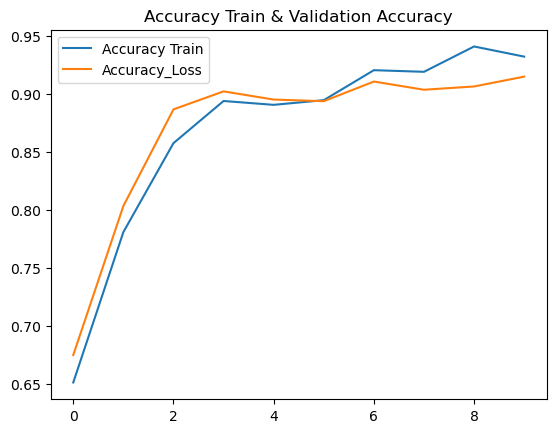

In [14]:
plt.plot(hist['accuracy'],label='Accuracy Train')
plt.plot(hist['val_accuracy'],label='Accuracy_Loss')
plt.title('Accuracy Train & Validation Accuracy')
plt.legend()

Show Graph Between Loss Train and Validation Loss

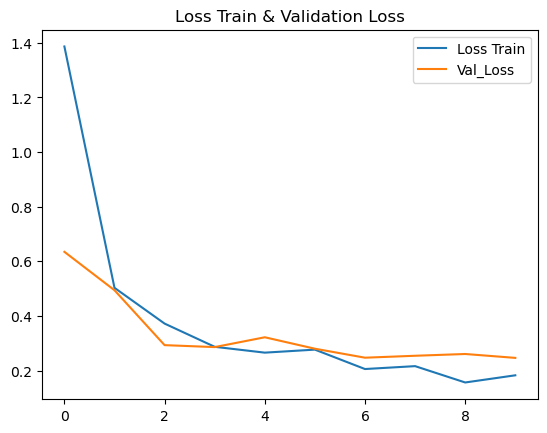

In [15]:
plt.plot(hist['loss'],label='Loss Train')
plt.plot(hist['val_loss'],label='Val_Loss')
plt.title('Loss Train & Validation Loss')
plt.legend()

Evaluate The Model and Print Accuracy and Loss  

In [16]:
score, acc = model.evaluate(X_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

36/36 [==============================] - 2s 65ms/step - loss: 0.2728 - accuracy: 0.9250
Test Loss = 0.2727968394756317
Test Accuracy = 0.9249779582023621


Predict The Output and Print it 

In [17]:
prediction = model.predict(X_test)
prediction

36/36 [==============================] - 2s 62ms/step


array([[7.3393369e-01, 2.6606634e-01],
       [9.9973315e-01, 2.6683151e-04],
       [2.9199603e-01, 7.0800394e-01],
       ...,
       [2.0192475e-03, 9.9798077e-01],
       [8.2172996e-01, 1.7827009e-01],
       [1.6181653e-03, 9.9838185e-01]], dtype=float32)

Store Prediction of each Row in List and Show it in The Table  

In [18]:
pred_label=[]
for row in prediction:
    N=np.argmax(row)
    if N==1:
        pred_label.append('with mask')
    else:
        pred_label.append('without mask')
pd.DataFrame(pred_label,columns=['Prediction'])

Prediction
0     without mask
1     without mask
2        with mask
3     without mask
4        with mask
...            ...
1128     with mask
1129     with mask
1130     with mask
1131  without mask
1132     with mask

[1133 rows x 1 columns]

Show The Images in The List of Prediction 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

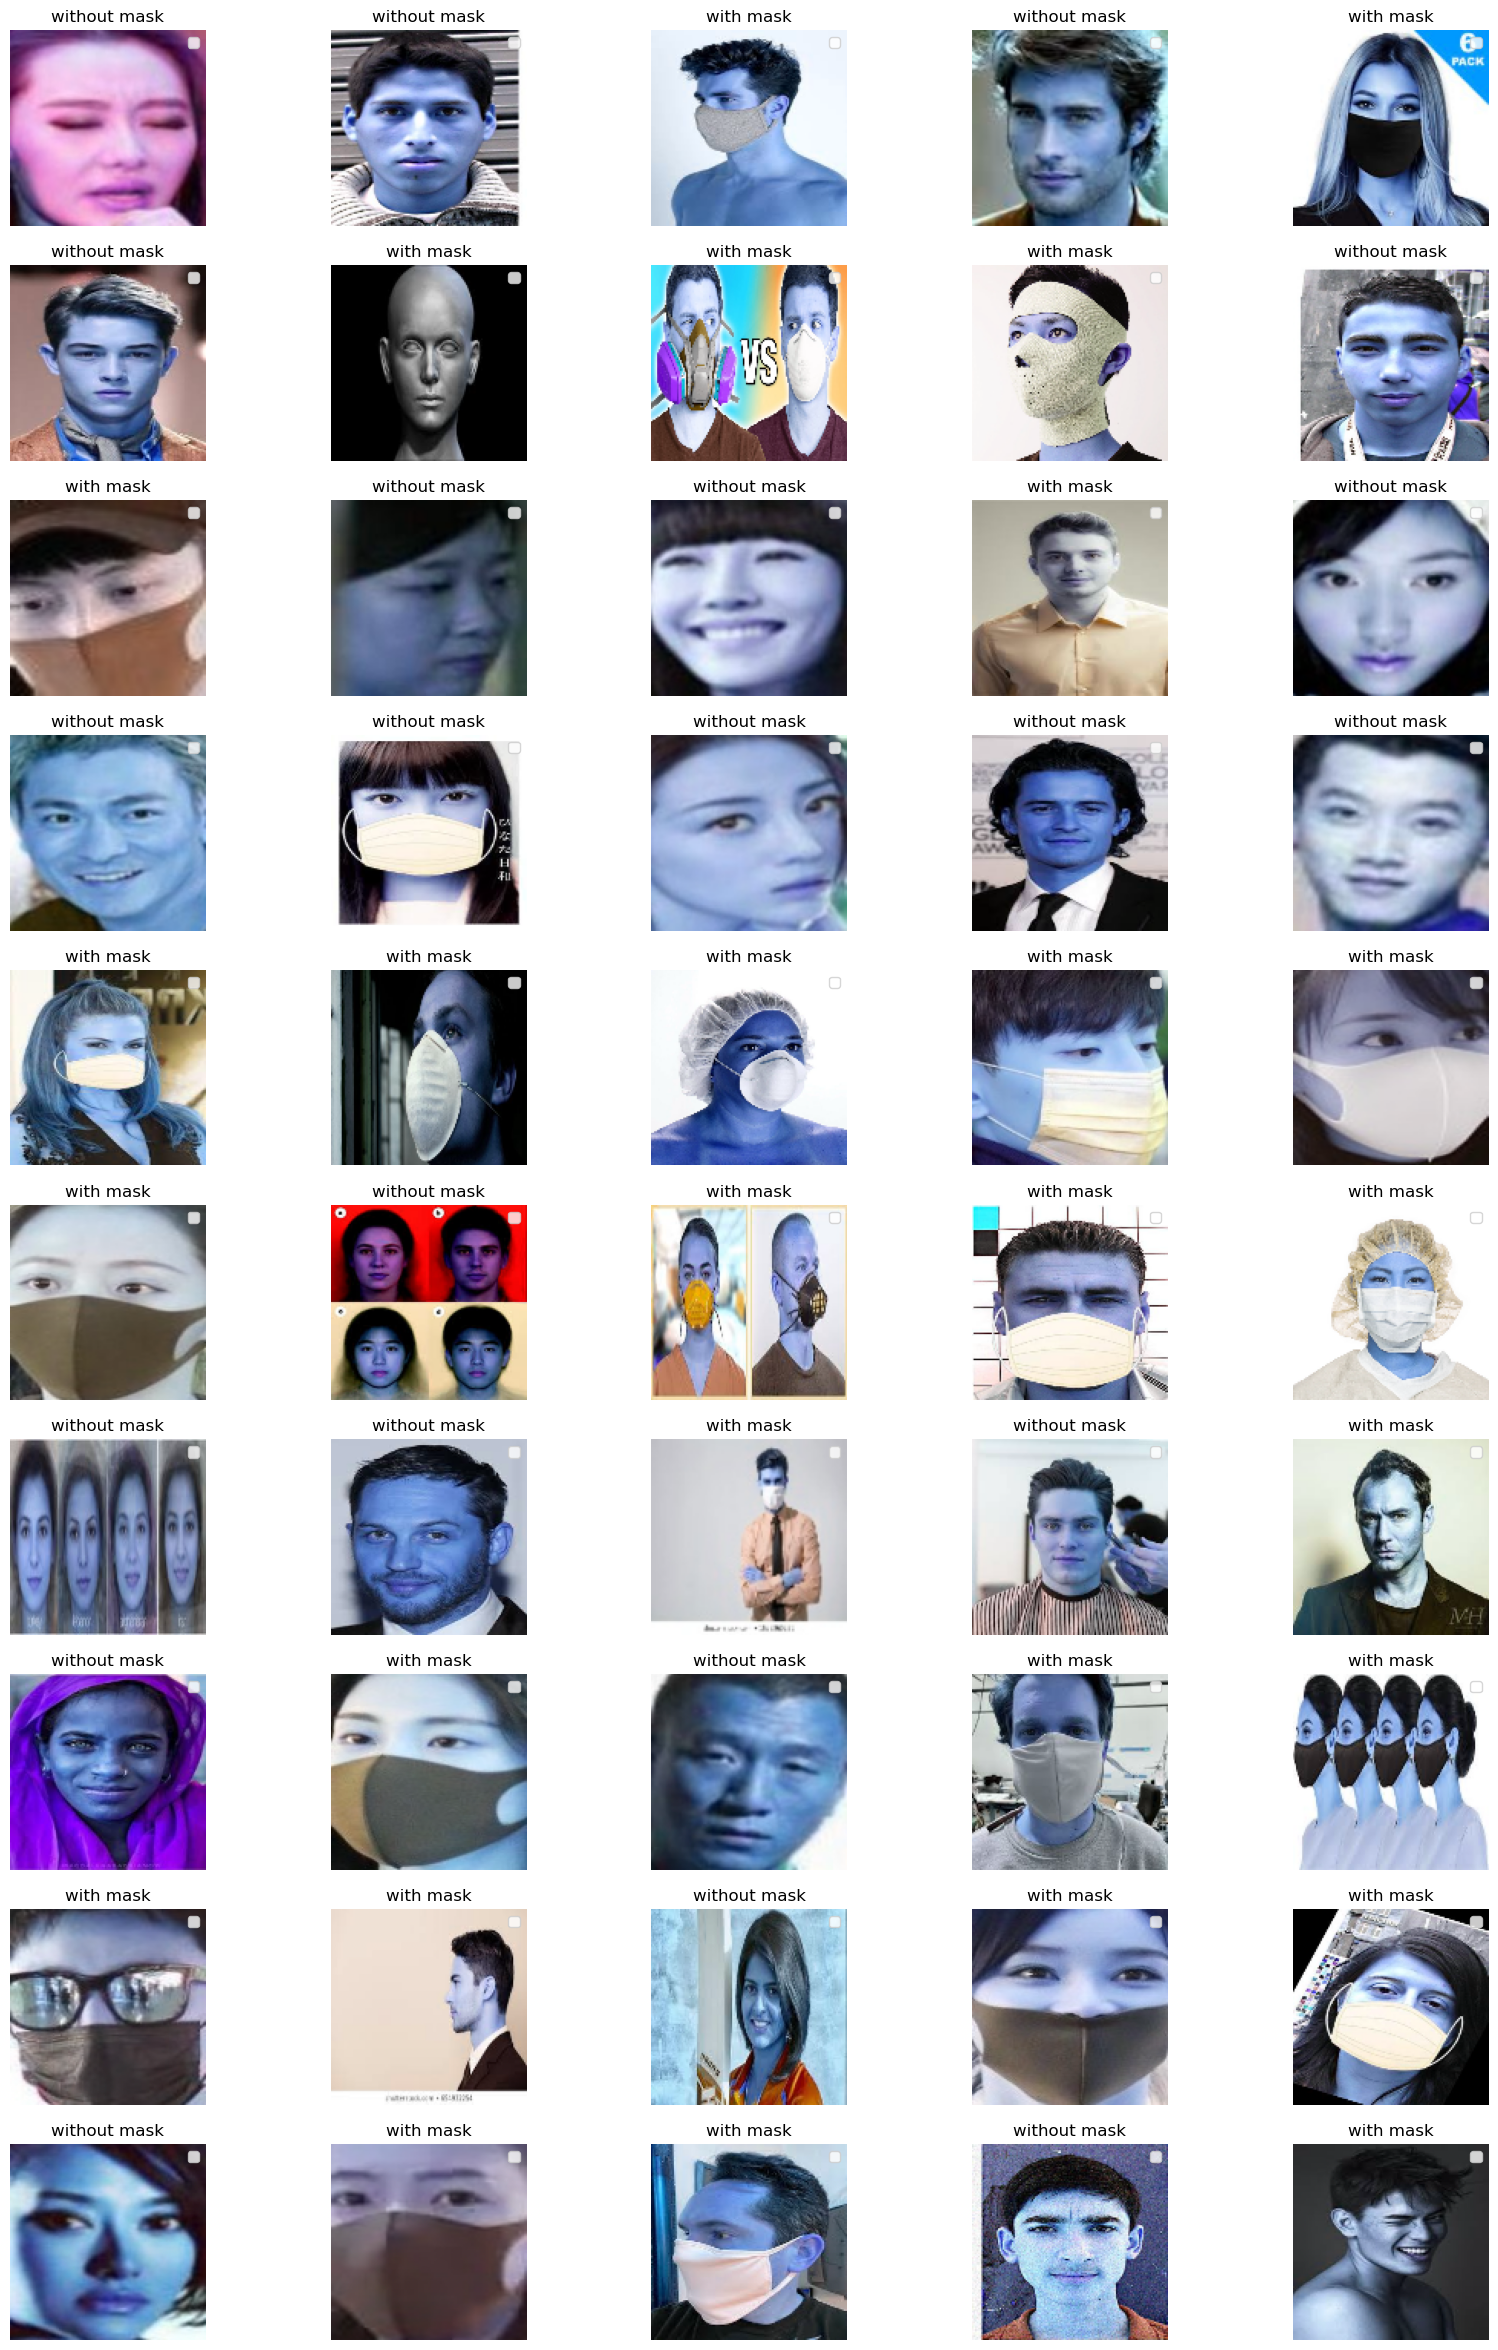

In [19]:
plt.figure(figsize=(20,30))
i=1
for img in X_test:
    if i==51:
        break
    plt.subplot(10,5,i)
    plt.imshow(img)
    plt.title(pred_label[i-1])
    plt.legend()
    i+=1
    plt.axis('off')

## **Calculating Confusion Matrix**

array([[541,  52],
       [ 33, 507]], dtype=int64)

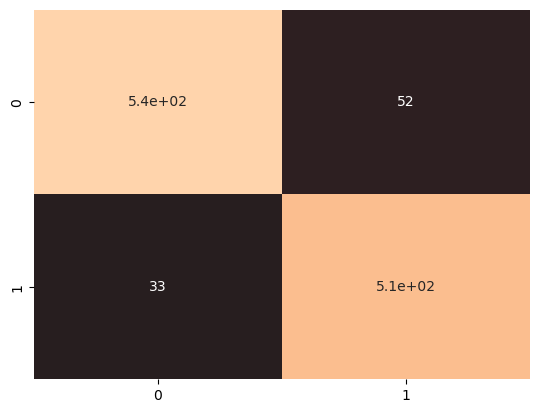

In [20]:
y_pred=[1 if m=='with mask' else 0 for m in pred_label]
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center = True,annot=True,cbar=False)
CM

## **Calculating classification Report**

In [21]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.94      0.91      0.93       593
           1       0.91      0.94      0.92       540

    accuracy                           0.92      1133
   macro avg       0.92      0.93      0.92      1133
weighted avg       0.93      0.92      0.93      1133

